1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import trapz
from matplotlib.ticker import MaxNLocator


1/sqrt(N):  [0.46788484 0.24659696 0.15596161 0.20924446 0.39543486]


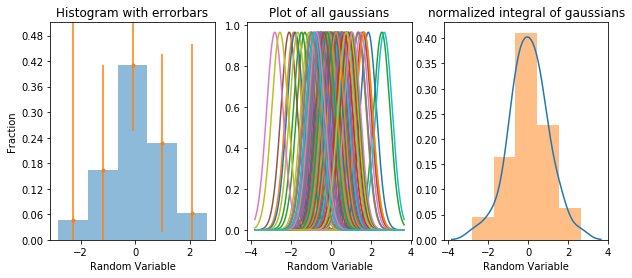

In [6]:
N = 100
x = np.random.normal(0, 1, N)
rng = np.linspace(x.min()-1, x.max()+1, 1000)
N_bins = 5

fig, ax = plt.subplots(1,3,figsize=(10,4))

counts, edges, _ = ax[0].hist(x, bins=N_bins, density=True, alpha=0.5)
pois_unc = 1/np.sqrt(counts*N)
print('1/sqrt(N): ', pois_unc)
center_points = (edges[:-1]+edges[1:])/2

std = 1.06*x.std()*x.size**(-1/5)
gaussians = [stats.norm(loc=x[i], scale=std) for i in range(N)]
x_gaussians = np.array([gaussian.pdf(rng) for gaussian in gaussians])
for gaussian in x_gaussians:
    ax[1].plot(rng, gaussian)

sums = np.sum(x_gaussians, axis=0)
integral = trapz(y=sums, x=rng)
ax[2].plot(rng, sums/integral)
ax[2].hist(x, bins=N_bins, density=True, alpha=0.5)

ax[0].errorbar(center_points, counts, yerr=pois_unc, fmt='.')
ax[0].set_ylabel('Fraction')
ax[0].set_xlabel('Random Variable')
ax[0].set_title('Histogram with errorbars')
ax[0].set_ylim(0, counts.max()+0.1)
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_xlabel('Random Variable')
ax[1].set_title('Plot of all gaussians')
ax[2].set_xlabel('Random Variable')
ax[2].set_title('normalized integral of gaussians')

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [11]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

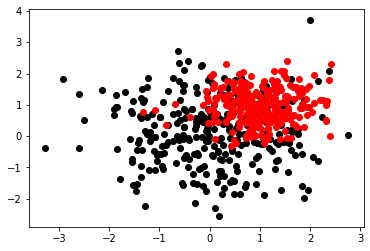

In [20]:
def gnrt_Two_Gaussians(mean1, std1, mean2, std2, N):
    test1 = np.random.multivariate_normal(mean1, std1*np.identity(2), size=N)
    test2 = np.random.multivariate_normal(mean2, std2*np.identity(2), size=N)

    return test1, test2

g1, g2 = generateTwoGaussians([0,0],1,[1,1],0.3,300)

plt.scatter(g1[:,0], g1[:,1], c='k')
plt.scatter(g2[:,0], g2[:,1], c='r')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot